In [1]:
import python_inventory as pyinv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("data/Animals2.csv", sep=",")
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
...,...,...,...
60,Brazilian tapir,160.000,169.0
61,Tenrec,0.900,2.6
62,Phalanger,1.620,11.4
63,Tree shrew,0.104,2.5


In [4]:
body = df['body'].values
brain = df['brain'].values
body = np.log(body)
brain = np.log(brain)

X = body
Xs = X.reshape(-1,1)
Y = brain

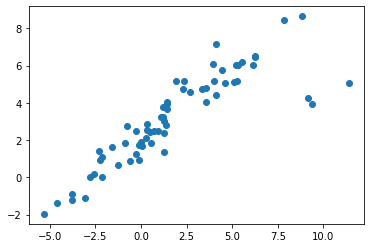

In [5]:
plt.scatter(body, brain)
plt.show()

In [6]:
line = pyinv.LinearModel(1)
line.init_param()

loss_square = pyinv.ErrorLoss(pyinv.Square())
am = pyinv.ArithMean()
risk = pyinv.Risk(line, loss_square, am)

gd = pyinv.GradientDescent(risk)
gd.fit(Xs, Y)
print(gd.K, line.param)


96 [2.17123129 0.59157349]


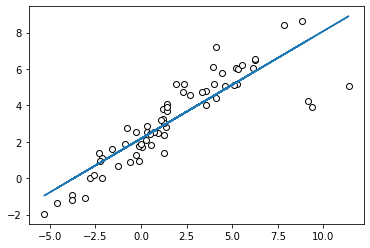

In [7]:
plt.scatter(body, brain, c='w', edgecolors='k')
plt.plot(X, line.evaluate_all(Xs))
plt.show()

In [8]:
line2 = pyinv.LinearModel(1)
line2.init_param()

loss_square = pyinv.ErrorLoss(pyinv.Square())
rho_func = pyinv.SoftQuantileFunc(pyinv.SoftAbs(0.001), 0.95)
wm = pyinv.WMMean(rho_func)
risk2 = pyinv.Risk(line2, loss_square, wm)

gd2 = pyinv.GradientDescent(risk2)
gd2.fit(Xs, Y)
print(gd2.K, line2.param)

156 [2.13478518 0.75168638]


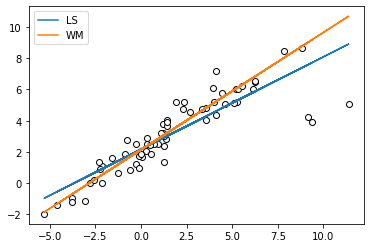

In [9]:
plt.scatter(body, brain, c='w', edgecolors='k')
plt.plot(X, line.evaluate_all(Xs), label='LS')
plt.plot(X, line2.evaluate_all(Xs), label='WM')
plt.legend()
plt.show()